pytorch官网： https://pytorch.org/docs/stable

PyTorch常用代码段合集：https://mp.weixin.qq.com/s/2bpT93KrqwWfE-Ob0iC8xA

## 1 张量（Tensor）处理


### 1.1 TORCH.GATHER理解

> torch.gather(input, dim, index, *, sparse_grad=False, out=None) → Tensor



具体是如何得到的呢？
https://blog.csdn.net/edogawachia/article/details/80515038

<img src="https://tva1.sinaimg.cn/large/008vxvgGgy1h80hwytl2kj319u0gugnh.jpg" alt="image-20221111002703552" style="zoom:50%;" />

In [6]:
"""
关键是“指定dim=1，也就是横向，dim=0，也就是纵向”
"""
import torch
t = torch.tensor([[1, 2], [3, 4]])
print(t)
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

tensor([[1, 2],
        [3, 4]])


tensor([[1, 1],
        [4, 3]])

## 2.模型操作

In [12]:
"""
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
"""

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


###  2.1 模型参数可视化
- https://github.com/TylerYep/torchinfo

- https://github.com/sksq96/pytorch-summary

- https://github.com/szagoruyko/pytorchviz



In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
from torchinfo import summary
batch_size = 16
>>> summary(model, input_size=(batch_size, 1, 28, 28))

==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
NeuralNetwork                            [16, 10]                  --
├─Flatten: 1-1                           [16, 784]                 --
├─Sequential: 1-2                        [16, 10]                  --
│    └─Linear: 2-1                       [16, 512]                 401,920
│    └─ReLU: 2-2                         [16, 512]                 --
│    └─Linear: 2-3                       [16, 512]                 262,656
│    └─ReLU: 2-4                         [16, 512]                 --
│    └─Linear: 2-5                       [16, 10]                  5,130
==========================================================================================
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (M): 10.72
==========================================================================================
Input size (MB): 0.05
Forward/backward pass size (MB): 0.13
Params size (MB): 2.68
Estimated Total Size (MB): 2.86
==========================================================================================

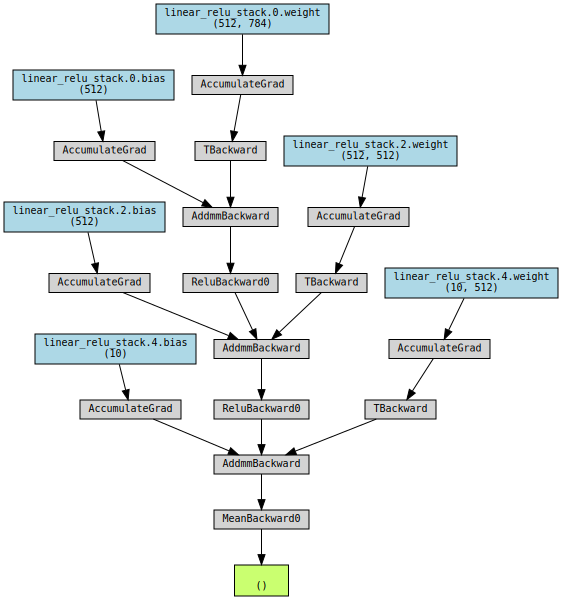

In [8]:
from torchviz import make_dot
x = torch.randn(1, 28,28)
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))

In [9]:
"""
查看网络中的参数
可以通过model.state_dict()或者model.named_parameters()函数查看现在的全部可训练参数（包括通过继承得到的父类中的参数）
"""
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0310,  0.0269, -0.0150,  ..., -0.0152,  0.0128, -0.0207],
        [ 0.0187, -0.0224,  0.0248,  ..., -0.0265, -0.0286,  0.0118]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0193, -0.0065], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0295, -0.0043,  0.0028,  ...,  0.0133, -0.0116, -0.0252],
        [ 0.0196,  0.0362,  0.0194,  ..., -0.0308,  0.0267, -0.0381]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0117,  0.0150], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[-0.0433,  0.0335, -0.0388,  ...,  0.0206,  0.0118, -0.0260],
        [-0.0252, -0.0074,  0.0414,  ...,  0.0182, -0.0299,  0.0036]],
       grad_fn=<SliceBackward>) 

La